In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
 housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

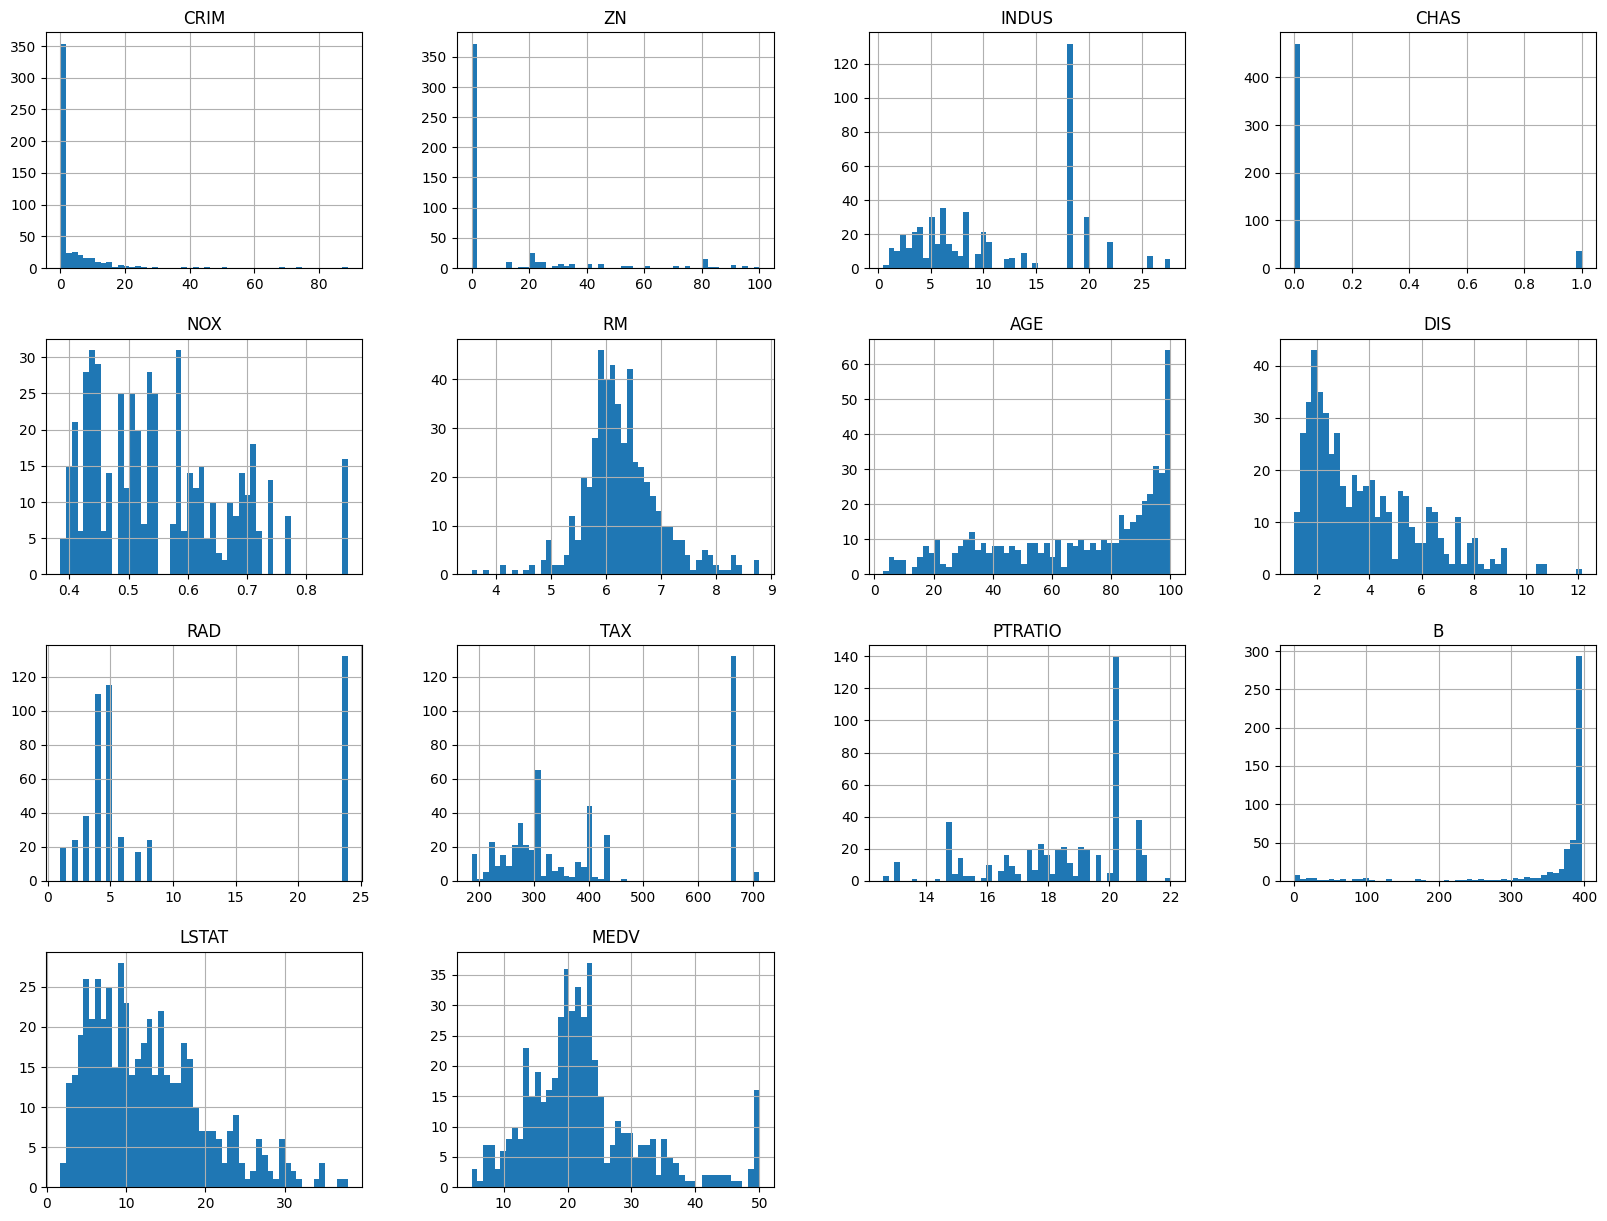

In [9]:
housing.hist(bins=50, figsize=(20,15))

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.4)

In [12]:
print(f"Rows in train set: {len(train_set )}\nRows in test set: {len(test_set)}\n")

Rows in train set: 304
Rows in test set: 202



In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.4, random_state=42)
print(f"Rows in train set: {len(train_set )}\nRows in test set: {len(test_set)}\n")

Rows in train set: 303
Rows in test set: 203



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 355 to 185
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     203 non-null    float64
 1   ZN       203 non-null    float64
 2   INDUS    203 non-null    float64
 3   CHAS     203 non-null    int64  
 4   NOX      203 non-null    float64
 5   RM       201 non-null    float64
 6   AGE      203 non-null    float64
 7   DIS      203 non-null    float64
 8   RAD      203 non-null    int64  
 9   TAX      203 non-null    int64  
 10  PTRATIO  203 non-null    float64
 11  B        203 non-null    float64
 12  LSTAT    203 non-null    float64
 13  MEDV     203 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 23.8 KB


In [16]:
strat_test_set['CHAS'].value_counts()

CHAS
0    189
1     14
Name: count, dtype: int64

In [17]:
strat_train_set['CHAS'].value_counts()

CHAS
0    282
1     21
Name: count, dtype: int64

In [18]:
housing = strat_train_set.copy()

In [19]:
corr_matrix = housing.corr()  #pandas

In [20]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.648873
ZN         0.364643
B          0.348920
DIS        0.256243
CHAS       0.242408
AGE       -0.375146
RAD       -0.377353
CRIM      -0.389025
NOX       -0.423808
TAX       -0.463797
PTRATIO   -0.493374
INDUS     -0.493774
LSTAT     -0.729937
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

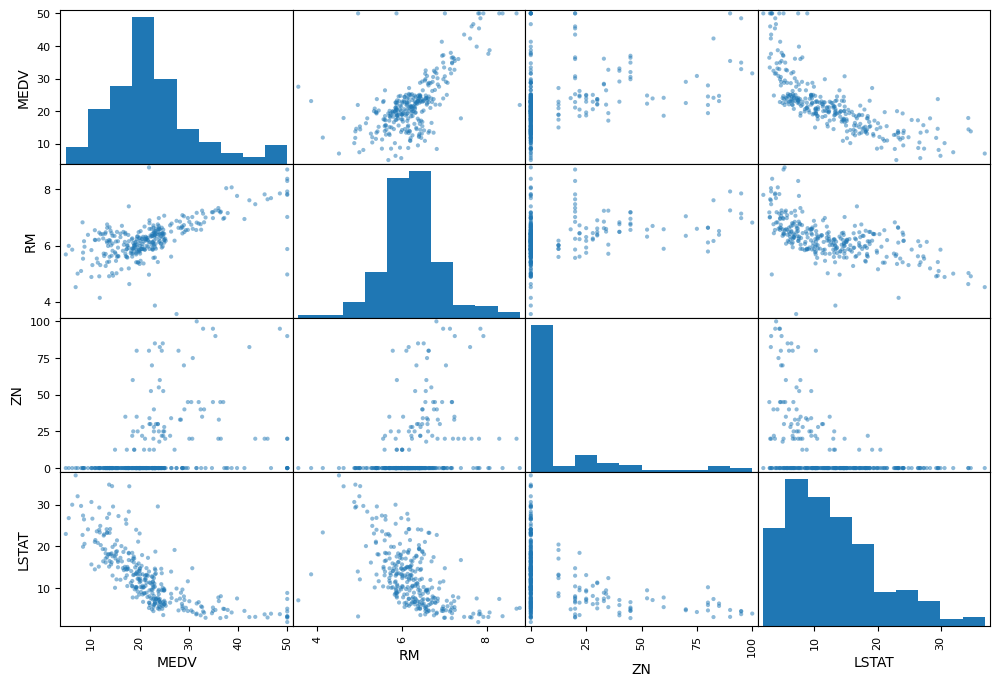

In [21]:
from pandas.plotting import scatter_matrix
attributes =  ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

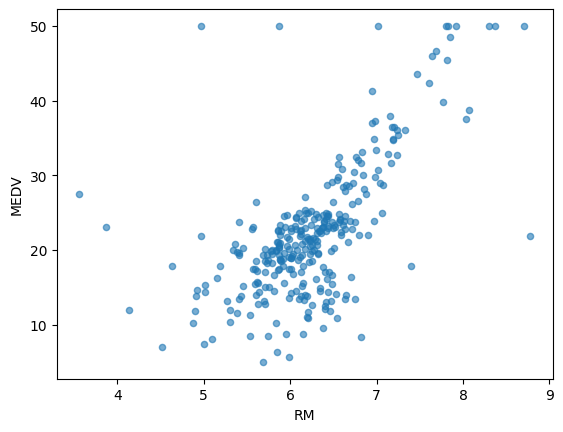

In [22]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.6)

In [23]:
 housing["TAXRM"] = housing['TAX']/housing['RM']

In [24]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
337,0.03041,0.0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56,18.5,37.998304
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8,64.874730
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,51.729874
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,187.026116
42,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3,37.769493


In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.648873
ZN         0.364643
B          0.348920
DIS        0.256243
CHAS       0.242408
AGE       -0.375146
RAD       -0.377353
CRIM      -0.389025
NOX       -0.423808
TAX       -0.463797
PTRATIO   -0.493374
INDUS     -0.493774
TAXRM     -0.520504
LSTAT     -0.729937
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

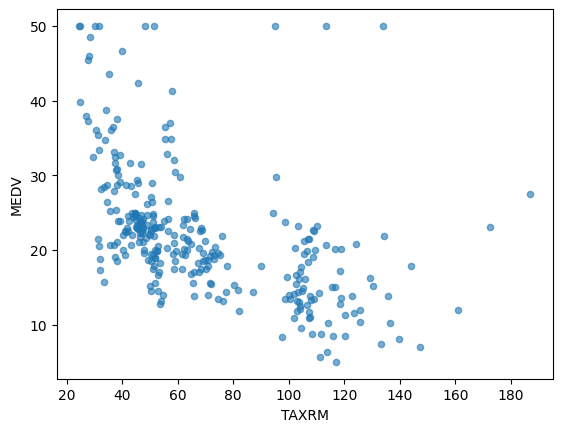

In [26]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.6)

In [27]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [28]:
median = housing["RM"].median()

In [29]:
median

6.2085

In [30]:
housing["RM"].fillna(median)  #the original data will remain unchanged

337    5.895
500    6.027
6      6.012
365    3.561
42     6.169
       ...  
101    6.781
405    5.683
367    3.863
423    6.103
455    6.525
Name: RM, Length: 303, dtype: float64

In [31]:
housing.shape

(303, 13)

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.6938e-01, 0.0000e+00, 1.0010e+01, 0.0000e+00, 5.3800e-01,
       6.2085e+00, 7.8100e+01, 3.1121e+00, 5.0000e+00, 3.5800e+02,
       1.9000e+01, 3.9150e+02, 1.1410e+01])

In [34]:
x = imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(x, columns=housing.columns)

In [36]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.604954,10.788779,11.469769,0.069307,0.561520,6.241738,68.528053,3.680605,9.696370,415.577558,18.440594,356.890627,12.751287
std,8.642295,22.288853,6.879708,0.254395,0.120027,0.699076,28.537266,2.016697,8.749279,168.511932,2.146050,90.555425,7.172860
min,0.006320,0.000000,0.740000,0.000000,0.392000,3.561000,6.000000,1.129600,1.000000,188.000000,13.000000,0.320000,1.920000
25%,0.085555,0.000000,5.190000,0.000000,0.455500,5.871500,43.900000,2.016250,4.000000,284.000000,17.350000,374.960000,6.970000
50%,0.269380,0.000000,10.010000,0.000000,0.538000,6.208500,78.100000,3.112100,5.000000,358.000000,19.000000,391.500000,11.410000
75%,3.685665,12.500000,18.100000,0.000000,0.639000,6.566000,94.050000,4.837500,24.000000,666.000000,20.200000,395.720000,16.915000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000


SCIKIT-LEARN DESIGN

1.Estimators - it estimates some parameter based on a dataset. eg-imputer
It has fit method and transform method.
Fit method fits the dataset and calculates internal parameters

2.Transformers - takes input and returns output based on the learnings from fit()
It also has a convenience function called fit_transform() which fits and then transforms.

3.Predictors - linear regression model is an example of predictor(). fit() and predict() are two common functions. it also gives score() function which will evaluate the predictions.

FEATURE SCALING
1. min-max scaling(normalization)
    (value-min)/(max-min)
   sklearn provides a class called MinMaxScaler for this
   
2.standardization
    (value-mean)/std
    sklearn provides a class called StandardScaler for this

In [37]:
#creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])    

In [38]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [39]:
housing_num_tr  #numpy array

array([[-0.4142947 , -0.48484443, -0.9143058 , ...,  0.82119064,
         0.41943485, -0.30600238],
       [-0.3918133 , -0.48484443, -0.25912627, ...,  0.35444751,
         0.44255282,  0.22045942],
       [-0.40758632,  0.07690175, -0.52410999, ..., -1.51252502,
         0.42817322, -0.04486615],
       ...,
       [ 1.14942298, -0.48484443,  0.96533148, ...,  0.82119064,
        -2.49398215,  0.08081438],
       [ 0.39933446, -0.48484443,  0.96533148, ...,  0.82119064,
        -3.91977451,  1.47167897],
       [ 0.13298719, -0.48484443,  0.96533148, ...,  0.82119064,
        -3.38441105,  0.75111057]])

In [40]:
housing_num_tr.shape

(303, 13)

In [41]:
#selecting a desired model for real estate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_labels)

LinearRegression()

In [42]:
some_data = housing.iloc[:5]

In [43]:
some_labels = housing_labels.iloc[:5]

In [44]:
prepared_data = my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([18.98132246, 20.68033146, 23.06518568, 17.12448953, 24.82439115])

In [46]:
list(some_labels)

[18.5, 16.8, 22.9, 27.5, 25.3]

In [47]:
#Evaluating the model
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [48]:
rmse

4.550305332330744

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [50]:
rmse_scores

array([6.49964095, 5.39784165, 3.95888111, 5.62929449, 3.70141361,
       6.12078574, 5.5381434 , 3.75140973, 3.60600829, 3.83173109])

In [51]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())

In [56]:
print_scores(rmse_scores)

scores: [6.49964095 5.39784165 3.95888111 5.62929449 3.70141361 6.12078574
 5.5381434  3.75140973 3.60600829 3.83173109]
mean: 4.80351500547148
standard deviation: 1.077042520576688


In [53]:
#saving the model
from joblib import dump, load
dump(model, 'temp.joblib')

['temp.joblib']

In [54]:
#testing the model
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(y_test))

In [55]:
final_rmse

5.063053612410264